<a href="https://colab.research.google.com/github/matheoBM/SleepApnea/blob/main/dados291_Antropo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Testes finais


*   Maior número de dados
*   Dados antropomórficos??
*Classificação com duas classes e com SMOTE




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder #Para atributo 'SEXO'
np.random.seed(42)

# Análises com Classificação


*   Classificação sem SMOTE
*   Classificação com SMOTE para 4 classes e 2 classes



In [ ]:
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Usado na validacao cruzada
def accuracy_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return accuracy_score(y, y_pred)

## Testes com quatro classes SEM smote

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Apneia/Apneia/Dados/DADOS291CORRETO_2.csv')
df

,CLASSE,IAH,MI,T90,SATMIN,SEXO,IDADE,ALTURA,PESO,IMC,...,ATTEN,PHASEEN,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V
0,NORMAL,3.07,40.88,0.03,87,F,35,1.66,69.6,25.2577,...,1.9329,0.9303,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962
1,NORMAL,1.93,18.82,0.00,92,F,50,1.59,98.7,39.0412,...,2.2780,0.9348,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244
2,NORMAL,0.40,54.30,0.00,92,M,27,1.80,91.0,28.0864,...,2.4694,0.9239,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442
3,NORMAL,3.65,25.52,1.37,41,F,61,1.59,103.7,41.0189,...,1.7214,0.9101,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198
4,NORMAL,1.15,22.25,0.07,88,F,26,NaN,59.7,#DIV/0!,...,1.5025,0.8909,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,GRAVE,117.50,115.00,34.30,69,F,63,1.62,89.5,34.103,...,2.6023,0.9178,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430
287,GRAVE,72.00,39.30,68.40,67,F,64,1.64,127.0,47.2189,...,1.6544,0.8764,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197
288,GRAVE,33.80,26.40,1.80,82,M,51,1.65,94.2,34.6006,...,2.4042,0.9269,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041
289,GRAVE,34.30,30.40,4.60,83,M,59,NaN,NaN,#DIV/0!,...,2.3561,0.8945,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880


Existem 17 paciente em altura e/ou peso. Aqui vou utilizar a técnica Multivariate feature imputation para estimar esses valores faltantes.

In [ ]:
#17 Pacientes estão sem alura e/ou peso
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = df.copy()

mice_imputer = IterativeImputer(random_state=42)
df['ALTURA'] = mice_imputer.fit_transform(df[['ALTURA']])
df['PESO'] = mice_imputer.fit_transform(df[['PESO']])

df

,CLASSE,IAH,MI,T90,SATMIN,SEXO,IDADE,ALTURA,PESO,IMC,...,ATTEN,PHASEEN,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V
0,NORMAL,3.07,40.88,0.03,87,F,35,1.660000,69.600000,25.2577,...,1.9329,0.9303,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962
1,NORMAL,1.93,18.82,0.00,92,F,50,1.590000,98.700000,39.0412,...,2.2780,0.9348,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244
2,NORMAL,0.40,54.30,0.00,92,M,27,1.800000,91.000000,28.0864,...,2.4694,0.9239,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442
3,NORMAL,3.65,25.52,1.37,41,F,61,1.590000,103.700000,41.0189,...,1.7214,0.9101,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198
4,NORMAL,1.15,22.25,0.07,88,F,26,1.649234,59.700000,#DIV/0!,...,1.5025,0.8909,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,GRAVE,117.50,115.00,34.30,69,F,63,1.620000,89.500000,34.103,...,2.6023,0.9178,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430
287,GRAVE,72.00,39.30,68.40,67,F,64,1.640000,127.000000,47.2189,...,1.6544,0.8764,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197
288,GRAVE,33.80,26.40,1.80,82,M,51,1.650000,94.200000,34.6006,...,2.4042,0.9269,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041
289,GRAVE,34.30,30.40,4.60,83,M,59,1.649234,89.262007,#DIV/0!,...,2.3561,0.8945,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880


In [ ]:
#Calculando IMCs faltantes
df['IMC'] = df['PESO']/(df['ALTURA'] * df['ALTURA'])
df

,CLASSE,IAH,MI,T90,SATMIN,SEXO,IDADE,ALTURA,PESO,IMC,...,ATTEN,PHASEEN,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V
0,NORMAL,3.07,40.88,0.03,87,F,35,1.660000,69.600000,25.257657,...,1.9329,0.9303,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962
1,NORMAL,1.93,18.82,0.00,92,F,50,1.590000,98.700000,39.041177,...,2.2780,0.9348,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244
2,NORMAL,0.40,54.30,0.00,92,M,27,1.800000,91.000000,28.086420,...,2.4694,0.9239,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442
3,NORMAL,3.65,25.52,1.37,41,F,61,1.590000,103.700000,41.018947,...,1.7214,0.9101,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198
4,NORMAL,1.15,22.25,0.07,88,F,26,1.649234,59.700000,21.948760,...,1.5025,0.8909,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,GRAVE,117.50,115.00,34.30,69,F,63,1.620000,89.500000,34.103033,...,2.6023,0.9178,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430
287,GRAVE,72.00,39.30,68.40,67,F,64,1.640000,127.000000,47.218917,...,1.6544,0.8764,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197
288,GRAVE,33.80,26.40,1.80,82,M,51,1.650000,94.200000,34.600551,...,2.4042,0.9269,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041
289,GRAVE,34.30,30.40,4.60,83,M,59,1.649234,89.262007,32.817260,...,2.3561,0.8945,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880


In [ ]:
#Atributo categorico
#Converte para número
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['SEXO']])

In [ ]:
#Adiciona as novas colunas e tira "SEXO"
df[ohe.categories_[0]] = transformed.toarray()
df.drop('SEXO', axis = 1, inplace=True)
df

,CLASSE,IAH,MI,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,NORMAL,3.07,40.88,0.03,87,35,1.660000,69.600000,25.257657,49.5922,...,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962,1.0,0.0
1,NORMAL,1.93,18.82,0.00,92,50,1.590000,98.700000,39.041177,48.4985,...,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244,1.0,0.0
2,NORMAL,0.40,54.30,0.00,92,27,1.800000,91.000000,28.086420,51.0391,...,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442,0.0,1.0
3,NORMAL,3.65,25.52,1.37,41,61,1.590000,103.700000,41.018947,60.8169,...,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198,1.0,0.0
4,NORMAL,1.15,22.25,0.07,88,26,1.649234,59.700000,21.948760,47.7805,...,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,GRAVE,117.50,115.00,34.30,69,63,1.620000,89.500000,34.103033,54.1595,...,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430,1.0,0.0
287,GRAVE,72.00,39.30,68.40,67,64,1.640000,127.000000,47.218917,64.2736,...,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197,1.0,0.0
288,GRAVE,33.80,26.40,1.80,82,51,1.650000,94.200000,34.600551,48.8423,...,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041,0.0,1.0
289,GRAVE,34.30,30.40,4.60,83,59,1.649234,89.262007,32.817260,62.6354,...,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880,0.0,1.0


## Realizando o teste apenas com índices de HRV
Aqui será realizado o teste considerando apenas os índices HRV. Sem T90, SatMin, dados antropométricos, sem SMOTE.

In [ ]:
y = df['CLASSE'].copy()
X = df.iloc[:, 9:43].copy()

In [ ]:
X = MinMaxScaler((-1,1)).fit_transform(X)
X

array([[-0.46468088, -0.69123572,  0.32400155, ..., -0.32628918,
         0.40157377, -0.59054935],
       [-0.52169505, -0.49902517,  0.44062788, ...,  0.04599227,
         0.0830986 , -0.5639908 ],
       [-0.38925452,  0.17764446, -0.23320546, ...,  0.16094473,
        -0.27213265, -0.27566861],
       ...,
       [-0.50377288, -0.22965486,  0.17227088, ...,  0.0371241 ,
         0.05211958, -0.52257181],
       [ 0.21525626, -0.59894627, -0.36342037, ..., -0.10584627,
        -0.23365896, -0.0877971 ],
       [-0.1347629 , -0.23438081, -0.37599247, ..., -0.19839519,
        -0.10026695, -0.15352127]])

In [ ]:
y

0      NORMAL
1      NORMAL
2      NORMAL
3      NORMAL
4      NORMAL
        ...  
286     GRAVE
287     GRAVE
288     GRAVE
289     GRAVE
290     GRAVE
Name: CLASSE, Length: 291, dtype: object

In [ ]:
max = [0,0]
for i in range(5):
    classificador=MLPClassifier(hidden_layer_sizes=(22,), max_iter=5000, activation="tanh", learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring = {"accuracy": accuracy_scorer} , return_estimator = True)
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        classificador_max =classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  0.3535632183908046
Accurácia:  0.40252873563218394
Accurácia:  0.346551724137931
Accurácia:  0.35758620689655174
Accurácia:  0.385287356321839
Melhor resultado: 
 Acurácia: 0.40252873563218394
 Seed: 1


[[ 9 14 15  9]
 [12 23 18 10]
 [11 18 23 18]
 [10 17 18 66]]


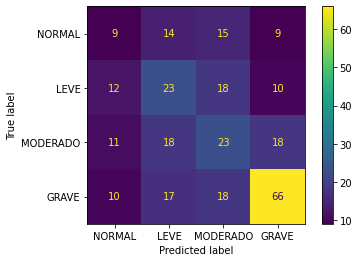

In [ ]:
labels = ["NORMAL", "LEVE", "MODERADO", "GRAVE"]
predito = cross_val_predict(classificador_max, X, y, cv = KFold(n_splits=10, shuffle=True))
conf_matrix = confusion_matrix(y, predito, labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

## Testes adicionando os dados antropométricos

In [ ]:
y = df['CLASSE'].copy()
X = df.iloc[:, 5:].copy()

In [ ]:
X = MinMaxScaler((-1,1)).fit_transform(X)
X

array([[-0.47692308,  0.07936508, -0.62093023, ..., -0.59054935,
         1.        , -1.        ],
       [-0.01538462, -0.14285714, -0.28255814, ..., -0.5639908 ,
         1.        , -1.        ],
       [-0.72307692,  0.52380952, -0.37209302, ..., -0.27566861,
        -1.        ,  1.        ],
       ...,
       [ 0.01538462,  0.04761905, -0.33488372, ..., -0.52257181,
        -1.        ,  1.        ],
       [ 0.26153846,  0.04518596, -0.39230224, ..., -0.0877971 ,
        -1.        ,  1.        ],
       [ 0.23076923, -0.23809524, -0.08139535, ..., -0.15352127,
         1.        , -1.        ]])

In [ ]:
max = [0,0]
for i in range(5):
    classificador=MLPClassifier(hidden_layer_sizes=(22,), max_iter=5000, activation="tanh", learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring = {"accuracy": accuracy_scorer} , return_estimator = True)
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        classificador_max =classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  0.38505747126436785
Accurácia:  0.37459770114942526
Accurácia:  0.40241379310344827
Accurácia:  0.4360919540229885
Accurácia:  0.4157471264367816
Melhor resultado: 
 Acurácia: 0.4360919540229885
 Seed: 3


[[18 12 12  5]
 [12 18 15 18]
 [10 17 19 24]
 [ 5 18 20 68]]


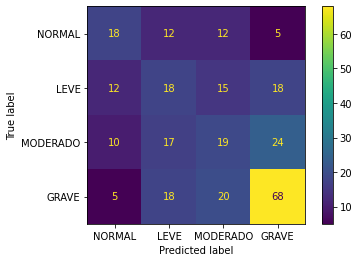

In [ ]:
labels = ["NORMAL", "LEVE", "MODERADO", "GRAVE"]
predito = cross_val_predict(classificador_max, X, y, cv = KFold(n_splits=10, shuffle=True))
conf_matrix = confusion_matrix(y, predito, labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

## Testes com HRV + Antropo + T90 e SatMin

In [ ]:
y = df['CLASSE'].copy()
X = df.iloc[:, 3:].copy()

In [ ]:
X = MinMaxScaler((-1,1)).fit_transform(X)
X

array([[-0.9994    ,  0.73770492, -0.47692308, ..., -0.59054935,
         1.        , -1.        ],
       [-1.        ,  0.90163934, -0.01538462, ..., -0.5639908 ,
         1.        , -1.        ],
       [-1.        ,  0.90163934, -0.72307692, ..., -0.27566861,
        -1.        ,  1.        ],
       ...,
       [-0.964     ,  0.57377049,  0.01538462, ..., -0.52257181,
        -1.        ,  1.        ],
       [-0.908     ,  0.60655738,  0.26153846, ..., -0.0877971 ,
        -1.        ,  1.        ],
       [ 0.716     , -0.47540984,  0.23076923, ..., -0.15352127,
         1.        , -1.        ]])

In [ ]:
max = [0,0]
for i in range(5):
    classificador=MLPClassifier(hidden_layer_sizes=(23,), max_iter=5000, activation="tanh", learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring = {"accuracy": accuracy_scorer} , return_estimator = True)
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        classificador_max =classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  0.3886206896551724
Accurácia:  0.4122988505747126
Accurácia:  0.42586206896551726
Accurácia:  0.41517241379310343
Accurácia:  0.40149425287356316
Melhor resultado: 
 Acurácia: 0.42586206896551726
 Seed: 2


[[15 12 12  8]
 [ 9 18 23 13]
 [13 21 17 19]
 [ 8 14 25 64]]


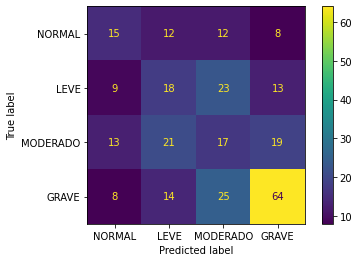

In [ ]:
labels = ["NORMAL", "LEVE", "MODERADO", "GRAVE"]
predito = cross_val_predict(classificador_max, X, y, cv = KFold(n_splits=10, shuffle=True))
conf_matrix = confusion_matrix(y, predito, labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

## Importância dos atributos 

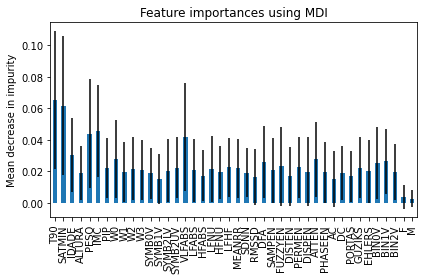

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feature_names = df.iloc[:, 3:].columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': df.iloc[:, 3:].columns,
    'Importance': forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


In [ ]:
importances

,Attribute,Importance
0,T90,0.065230
1,SATMIN,0.061695
5,IMC,0.045701
4,PESO,0.043918
15,VLFABS,0.041694
2,IDADE,0.030214
7,W0,0.027735
30,ATTEN,0.027541
38,BIN1V,0.026252
24,DFA,0.025828


Accurácia:  0.4978160919540229
Accurácia:  0.48080459770114947
Accurácia:  0.48080459770114936
Accurácia:  0.4872413793103448
Accurácia:  0.48793103448275854
Melhor resultado: 
 Acurácia: 0.4978160919540229
 Seed: 0
[[19 11 11  6]
 [11 15 16 21]
 [ 9 14 15 32]
 [ 3  8 13 87]]


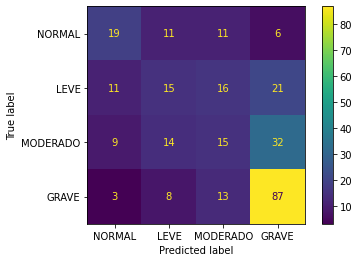

In [ ]:
max = [0,0]
for i in range(5):
    classificador=RandomForestClassifier(random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring = {"accuracy": accuracy_scorer} , return_estimator = True)
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        classificador_max =classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

labels = ["NORMAL", "LEVE", "MODERADO", "GRAVE"]
predito = cross_val_predict(classificador_max, X, y, cv = KFold(n_splits=10, shuffle=True))
conf_matrix = confusion_matrix(y, predito, labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

## Testes com duas classes (IAH >= 15) ou não (IAH < 15)

In [ ]:
#Cria dataframe com as classes
conditions = [
    (df['IAH'] < 15),
    (df['IAH'] >= 15)
]
classes = ['NORMAL', 'APNEICO']

#Adiciona coluna de classes
df_two_classes = df.copy()
df_two_classes['CLASSE'] = np.select(conditions, classes)
df_two_classes

,CLASSE,IAH,MI,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,NORMAL,3.07,40.88,0.03,87,35,1.660000,69.600000,25.257657,49.5922,...,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962,1.0,0.0
1,NORMAL,1.93,18.82,0.00,92,50,1.590000,98.700000,39.041177,48.4985,...,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244,1.0,0.0
2,NORMAL,0.40,54.30,0.00,92,27,1.800000,91.000000,28.086420,51.0391,...,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442,0.0,1.0
3,NORMAL,3.65,25.52,1.37,41,61,1.590000,103.700000,41.018947,60.8169,...,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198,1.0,0.0
4,NORMAL,1.15,22.25,0.07,88,26,1.649234,59.700000,21.948760,47.7805,...,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,APNEICO,117.50,115.00,34.30,69,63,1.620000,89.500000,34.103033,54.1595,...,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430,1.0,0.0
287,APNEICO,72.00,39.30,68.40,67,64,1.640000,127.000000,47.218917,64.2736,...,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197,1.0,0.0
288,APNEICO,33.80,26.40,1.80,82,51,1.650000,94.200000,34.600551,48.8423,...,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041,0.0,1.0
289,APNEICO,34.30,30.40,4.60,83,59,1.649234,89.262007,32.817260,62.6354,...,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880,0.0,1.0


In [ ]:
df_two_classes['CLASSE'].value_counts()

APNEICO    181
NORMAL     110
Name: CLASSE, dtype: int64

In [ ]:
y = df_two_classes['CLASSE'].copy()
X = df_two_classes.iloc[:, 3:].copy()
X = MinMaxScaler((-1,1)).fit_transform(X)

In [ ]:
X.shape

(291, 42)

In [ ]:
max = [0,0]
for i in range(5):
    classificador=MLPClassifier(hidden_layer_sizes=(22,), max_iter=5000, activation="tanh", learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring = {"accuracy": accuracy_scorer} , return_estimator = True)
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        classificador_max =classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  0.6805747126436782
Accurácia:  0.7042528735632184
Accurácia:  0.6739080459770116
Accurácia:  0.7114942528735633
Accurácia:  0.6634482758620689
Melhor resultado: 
 Acurácia: 0.7114942528735633
 Seed: 3


[[ 65  45]
 [ 46 135]]


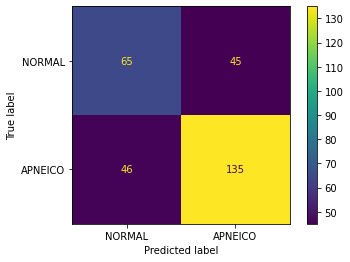

In [ ]:
labels = ["NORMAL", "APNEICO"]
predito = cross_val_predict(classificador_max, X, y, cv = KFold(n_splits=10, shuffle=True))
conf_matrix = confusion_matrix(y, predito, labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

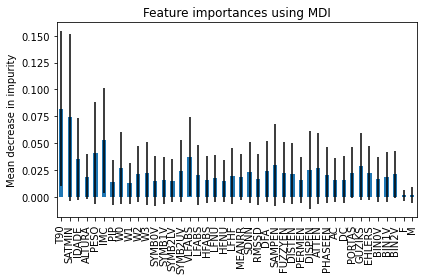

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feature_names = df.iloc[:, 3:].columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': df.iloc[:, 3:].columns,
    'Importance': forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


In [ ]:
importances

,Attribute,Importance
0,T90,0.081981
1,SATMIN,0.073966
5,IMC,0.052511
4,PESO,0.040696
15,VLFABS,0.037220
2,IDADE,0.035182
25,SAMPEN,0.029533
35,GUZIKS,0.028364
7,W0,0.026951
30,ATTEN,0.026675


Accurácia:  0.7351724137931035
Accurácia:  0.6944827586206896
Accurácia:  0.7250574712643678
Accurácia:  0.7119540229885059
Accurácia:  0.7045977011494253
Melhor resultado: 
 Acurácia: 0.7351724137931035
 Seed: 0
[[ 56  54]
 [ 27 154]]


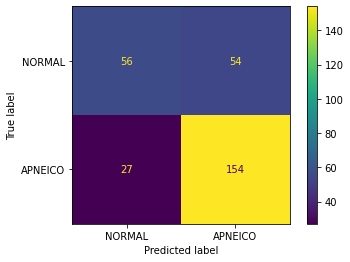

In [ ]:
max = [0,0]
for i in range(5):
    classificador=RandomForestClassifier(random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring = {"accuracy": accuracy_scorer} , return_estimator = True)
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        classificador_max =classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

labels = ["NORMAL", "APNEICO"]
predito = cross_val_predict(classificador_max, X, y, cv = KFold(n_splits=10, shuffle=True))
conf_matrix = confusion_matrix(y, predito, labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

## Testes com SMOTE para quatro classes

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Realiza o over-sampling
smote = SMOTE()
X, y = smote.fit_resample(df.iloc[:, 3:], df['CLASSE'])
from collections import Counter
y.value_counts()

NORMAL      111
LEVE        111
MODERADO    111
GRAVE       111
Name: CLASSE, dtype: int64

In [ ]:
oversample_df = X
oversample_df['CLASSE'] = y
oversample_df["SMOTE"] = 0
oversample_df.loc[291:, ['SMOTE']] = 1
oversample_df

,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,W0,W1,W2,...,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M,CLASSE,SMOTE
0,0.030000,87,35,1.660000,69.600000,25.257657,49.592200,4.076800,48.394300,42.170300,...,46.622000,47.869900,-0.213200,17.225300,68.778600,13.996200,1.000000,0.000000,NORMAL,0
1,0.000000,92,50,1.590000,98.700000,39.041177,48.498500,6.378800,52.100300,31.133300,...,49.243400,48.993300,-0.127300,24.811000,60.564600,14.624400,1.000000,0.000000,NORMAL,0
2,0.000000,92,27,1.800000,91.000000,28.086420,51.039100,14.482900,30.688100,42.071000,...,52.365700,57.275400,2.401700,27.153300,51.402600,21.444200,0.000000,1.000000,NORMAL,0
3,1.370000,41,61,1.590000,103.700000,41.018947,60.816900,5.623500,20.441900,59.728200,...,50.045700,50.284800,0.096000,11.294600,58.485500,30.219800,1.000000,0.000000,NORMAL,0
4,0.070000,88,26,1.649234,59.700000,21.948760,47.780500,1.478000,55.017600,42.248400,...,54.536800,56.393700,1.441400,12.713500,79.951600,7.334900,1.000000,0.000000,NORMAL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,0.000000,91,37,1.534743,82.675526,34.538771,54.404229,4.310656,42.843325,38.169031,...,51.323582,51.945632,0.398311,20.502666,60.856040,18.641333,1.000000,0.000000,NORMAL,1
440,1.270296,44,57,1.585326,100.942573,40.134023,60.550847,5.755218,20.835542,59.367912,...,50.089632,50.403883,0.118324,11.625195,58.309508,30.065213,1.000000,0.000000,NORMAL,1
441,0.000000,90,30,1.673002,69.160202,24.691845,55.240157,6.372575,36.939148,41.353431,...,51.047096,52.131921,0.560074,24.305831,58.469823,17.224246,1.000000,0.000000,NORMAL,1
442,0.564792,86,61,1.582675,63.267490,25.221404,62.165782,0.964291,28.796928,52.900557,...,48.961224,49.250034,-0.178942,13.425572,68.192530,18.381998,0.929584,0.070416,NORMAL,1


In [ ]:
X = oversample_df.iloc[:, 0:42].copy()
y = oversample_df['CLASSE'].copy()
X = MinMaxScaler((-1,1)).fit_transform(X)

In [ ]:
max = [0,0]
for i in range(5):
    classificador=MLPClassifier(hidden_layer_sizes=(22,), max_iter=5000, activation="tanh", learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring = {"accuracy": accuracy_scorer} , return_estimator = True)
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        classificador_max =classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  0.6282828282828283
Accurácia:  0.650909090909091
Accurácia:  0.6353535353535353
Accurácia:  0.6821717171717172
Accurácia:  0.633030303030303
Melhor resultado: 
 Acurácia: 0.6821717171717172
 Seed: 3


Acurácia: 0.5120274914089347
[[28  9  5  5]
 [11 30 13  9]
 [12 14 31 13]
 [ 5 23 23 60]]


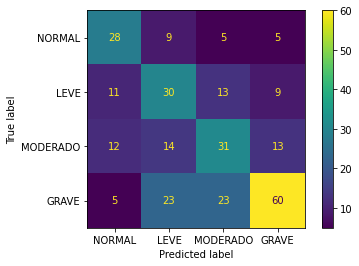

In [ ]:
#Calculando a acurácia penas dos pacientes não sintéticos
labels = ["NORMAL", "LEVE", "MODERADO", "GRAVE"]
y_pred = cross_val_predict(classificador_max, X, y, cv = KFold(n_splits=10, shuffle=True))
print(f"Acurácia: {accuracy_score(y[:291], y_pred[:291])}") #Pega só os dados reais
conf_matrix = confusion_matrix(y[:291], y_pred[:291], labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

[[85 15 11  0]
 [10 75 16 10]
 [10 25 54 22]
 [ 5 12 32 62]]


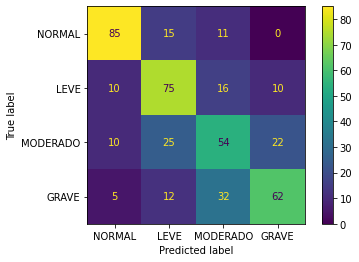

In [ ]:
labels = ["NORMAL", "LEVE", "MODERADO", "GRAVE"]
predito = cross_val_predict(classificador_max, X, y, cv = KFold(n_splits=10, shuffle=True))
conf_matrix = confusion_matrix(y, predito, labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

## Importância

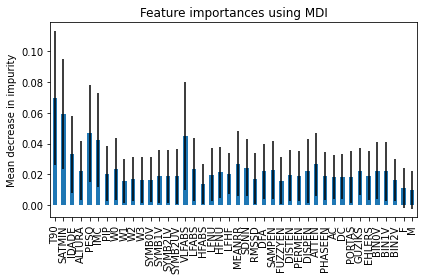

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feature_names = oversample_df.iloc[:, 0:42].columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': oversample_df.iloc[:, 0:42].columns,
    'Importance': forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


In [ ]:
importances

,Attribute,Importance
1,SATMIN,0.067316
0,T90,0.059983
4,PESO,0.052079
15,VLFABS,0.047562
5,IMC,0.040828
24,DFA,0.028662
2,IDADE,0.025688
38,BIN1V,0.025246
7,W0,0.024558
3,ALTURA,0.024137


Acurácia: 0.6494845360824743
[[34  7  5  1]
 [ 7 42  7  7]
 [ 7 11 36 16]
 [ 1 13 20 77]]


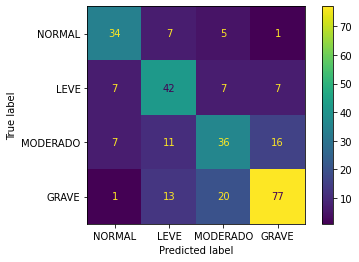

In [ ]:
#Calculando a acurácia penas dos pacientes não sintéticos
labels = ["NORMAL", "LEVE", "MODERADO", "GRAVE"]
y_pred = cross_val_predict(RandomForestClassifier(), X, y, cv = KFold(n_splits=10, shuffle=True))
print(f"Acurácia: {accuracy_score(y[:291], y_pred[:291])}") #Pega só os dados reais
conf_matrix = confusion_matrix(y[:291], y_pred[:291], labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

Acurácia: 0.7342342342342343
[[93 11  4  3]
 [18 71 13  9]
 [ 9 10 70 22]
 [ 4 13 15 79]]


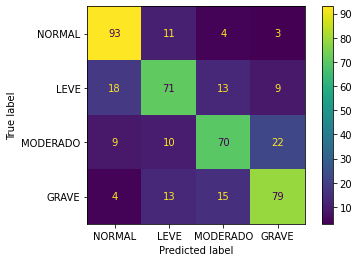

In [ ]:
labels = ["NORMAL", "LEVE", "MODERADO", "GRAVE"]
predito = cross_val_predict(RandomForestClassifier(random_state=42), X, y, cv = KFold(n_splits=10, shuffle=True))
conf_matrix = confusion_matrix(y, predito, labels=labels)
print(f"Acurácia: {accuracy_score(y, y_pred)}") 
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

## Teste COM smote para duas classes


In [ ]:
#Realiza o over-sampling
smote = SMOTE()
X, y = smote.fit_resample(df_two_classes.iloc[:, 3:], df_two_classes['CLASSE'])

In [ ]:
X = MinMaxScaler((-1,1)).fit_transform(X)


In [ ]:
max = [0,0]
for i in range(5):
    classificador=MLPClassifier(hidden_layer_sizes=(23,), max_iter=5000, activation="tanh", learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring = {"accuracy": accuracy_scorer} , return_estimator = True)
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        classificador_max =classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  0.7515765765765765
Accurácia:  0.7457957957957959
Accurácia:  0.7788288288288288
Accurácia:  0.7733483483483484
Accurácia:  0.7649399399399399
Melhor resultado: 
 Acurácia: 0.7788288288288288
 Seed: 2


Acurácia: 0.718213058419244
[[ 81  29]
 [ 53 128]]


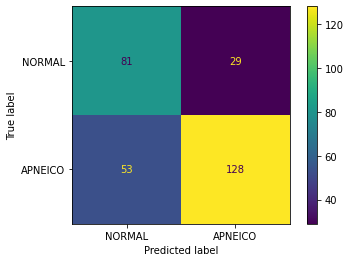

In [ ]:
#Calculando a acurácia penas dos pacientes não sintéticos
labels = ["NORMAL", "APNEICO"]
y_pred = cross_val_predict(classificador_max, X, y, cv = KFold(n_splits=10, shuffle=True))
print(f"Acurácia: {accuracy_score(y[:291], y_pred[:291])}")
conf_matrix = confusion_matrix(y[:291], y_pred[:291], labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

[[150  31]
 [ 48 133]]


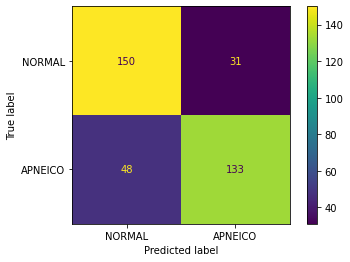

In [ ]:
labels = ["NORMAL", "APNEICO"]
predito = cross_val_predict(classificador_max, X, y, cv = KFold(n_splits=10, shuffle=True))
conf_matrix = confusion_matrix(y, predito, labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

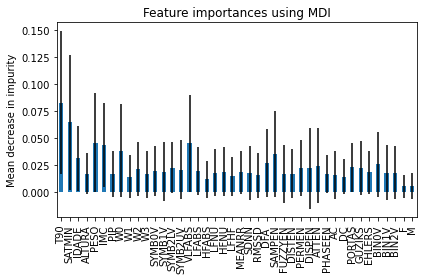

In [ ]:
from sklearn.ensemble import RandomForestClassifier
feature_names = oversample_df.iloc[:, 0:42].columns
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': oversample_df.iloc[:, 0:42].columns,
    'Importance': forest.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


In [ ]:
importances

,Attribute,Importance
0,T90,0.082790
1,SATMIN,0.064690
4,PESO,0.045783
15,VLFABS,0.045294
5,IMC,0.043908
7,W0,0.038310
25,SAMPEN,0.034950
2,IDADE,0.031162
24,DFA,0.026911
37,BIN0V,0.025569


Acurácia: 0.7628865979381443
[[ 87  23]
 [ 46 135]]


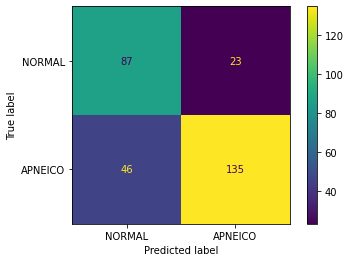

In [ ]:
#Calculando a acurácia penas dos pacientes não sintéticos
labels = ["NORMAL", "APNEICO"]
y_pred = cross_val_predict(RandomForestClassifier(random_state=42), X, y, cv = KFold(n_splits=10, shuffle=True))
print(f"Acurácia: {accuracy_score(y[:291], y_pred[:291])}")
conf_matrix = confusion_matrix(y[:291], y_pred[:291], labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

# Teste temporário: Principal component analys

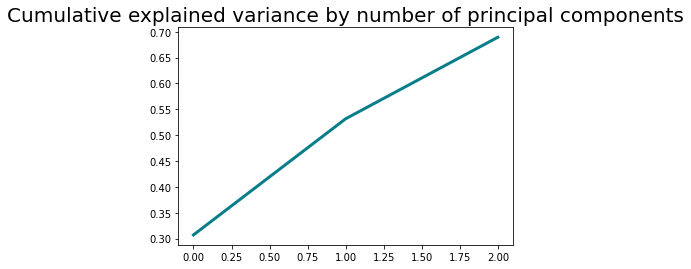

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(3).fit(X)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [ ]:
components = PCA(3).fit_transform(X)
max = [0,0]
for i in range(5):
    classificador=MLPClassifier(hidden_layer_sizes=(6,), max_iter=5000, activation="tanh", learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, components, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring = {"accuracy": accuracy_scorer} , return_estimator = True)
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        classificador_max =classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  0.6134384384384385
Accurácia:  0.6215465465465466
Accurácia:  0.5886636636636637
Accurácia:  0.582957957957958
Accurácia:  0.60503003003003
Melhor resultado: 
 Acurácia: 0.6215465465465466
 Seed: 1


Acurácia: 0.6666666666666666
[[ 76  34]
 [ 63 118]]


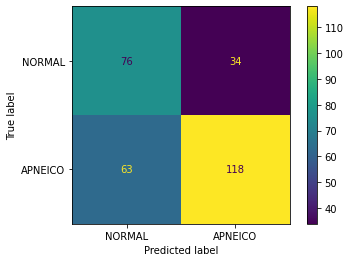

In [ ]:
#Calculando a acurácia penas dos pacientes não sintéticos
labels = ["NORMAL", "APNEICO"]
y_pred = cross_val_predict(classificador_max, components, y, cv = KFold(n_splits=10, shuffle=True))
print(f"Acurácia: {accuracy_score(y[:291], y_pred[:291])}")
conf_matrix = confusion_matrix(y[:291], y_pred[:291], labels=labels)
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot()
plt.show()

## Seleção de atributos

In [ ]:
#Seleção de atributos
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(MLPClassifier(hidden_layer_sizes=(23,), learning_rate_init=0.1, max_iter=400, activation='tanh', random_state=42))
sfs.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_p

SequentialFeatureSelector(estimator=MLPClassifier(activation='tanh',
                                                  hidden_layer_sizes=(23,),
                                                  learning_rate_init=0.1,
                                                  max_iter=400,
                                                  random_state=42))

In [ ]:
df.iloc[:, 3:].columns[sfs.get_support()]

Index(['T90', 'SATMIN', 'IDADE', 'PESO', 'IMC', 'W0', 'W2', 'W3', 'SYMB0V',
       'SYMB2UV', 'LFABS', 'HFABS', 'MEANRR', 'SDNN', 'RMSSD', 'DFA ',
       'DISTEN', 'ATTEN', 'PHASEEN', 'AC', 'M'],
      dtype='object')

In [ ]:
X_select = sfs.transform(X)
print(X_select.shape)
mlp = MLPClassifier(hidden_layer_sizes=(22,), learning_rate_init=0.1,solver='sgd', max_iter=5000, activation='tanh', random_state=42)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cross_val = cross_validate(mlp, X_select, y, cv=cv, scoring= {'accuracy':accuracy_scorer})
accuracy = np.mean(cross_val['test_accuracy'])
print('Acurácia = ', cross_val['test_accuracy'])

(350, 21)
Acurácia =  [0.74285714 0.77142857 0.91428571 0.82857143 0.65714286 0.85714286
 0.82857143 0.74285714 0.82857143 0.77142857]


In [ ]:
np.mean(cross_val['test_accuracy'])

0.7942857142857143

#Análises com regressão

## Testes apenas com índices HRV

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


#Criação de um score para coeficiente e para rmse
#Será usado no cross_validate
def get_r_numpy_corrcoef_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.corrcoef(y, y_pred)[0,1]
def mean_squared_error_score(estimator, X, y):
    y_pred = estimator.predict(X)
    return mean_squared_error(y, y_pred, squared = False)

In [ ]:
df

,CLASSE,IAH,MI,T90,SATMIN,IDADE,ALTURA,PESO,IMC,PIP,...,AC,DC,PORTAS,GUZIKS,EHLERS,BIN0V,BIN1V,BIN2V,F,M
0,NORMAL,3.07,40.88,0.03,87,35,1.660000,69.600000,25.257657,49.5922,...,-11.9732,10.4526,46.6220,47.8699,-0.2132,17.2253,68.7786,13.9962,1.0,0.0
1,NORMAL,1.93,18.82,0.00,92,50,1.590000,98.700000,39.041177,48.4985,...,-6.3287,6.1144,49.2434,48.9933,-0.1273,24.8110,60.5646,14.6244,1.0,0.0
2,NORMAL,0.40,54.30,0.00,92,27,1.800000,91.000000,28.086420,51.0391,...,-13.4549,14.9428,52.3657,57.2754,2.4017,27.1533,51.4026,21.4442,0.0,1.0
3,NORMAL,3.65,25.52,1.37,41,61,1.590000,103.700000,41.018947,60.8169,...,-14.5812,14.4796,50.0457,50.2848,0.0960,11.2946,58.4855,30.2198,1.0,0.0
4,NORMAL,1.15,22.25,0.07,88,26,1.649234,59.700000,21.948760,47.7805,...,-29.3785,35.4046,54.5368,56.3937,1.4414,12.7135,79.9516,7.3349,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,GRAVE,117.50,115.00,34.30,69,63,1.620000,89.500000,34.103033,54.1595,...,-11.6846,10.8219,47.8445,48.0653,-0.2136,31.9158,46.3412,21.7430,1.0,0.0
287,GRAVE,72.00,39.30,68.40,67,64,1.640000,127.000000,47.218917,64.2736,...,-5.2141,7.1196,57.4381,57.5743,1.4235,9.6522,61.7281,28.6197,1.0,0.0
288,GRAVE,33.80,26.40,1.80,82,51,1.650000,94.200000,34.600551,48.8423,...,-19.3183,21.7097,52.3061,56.6817,2.0795,24.6303,59.7656,15.6041,0.0,1.0
289,GRAVE,34.30,30.40,4.60,83,59,1.649234,89.262007,32.817260,62.6354,...,-3.5383,4.1281,52.1756,53.5385,0.7252,21.7171,52.3949,25.8880,0.0,1.0


In [ ]:
y = df['IAH'].copy()
X = df.iloc[:, 9:43].copy()

In [ ]:
X = MinMaxScaler((-1,1)).fit_transform(X)
X

array([[-0.46468088, -0.69123572,  0.32400155, ..., -0.32628918,
         0.40157377, -0.59054935],
       [-0.52169505, -0.49902517,  0.44062788, ...,  0.04599227,
         0.0830986 , -0.5639908 ],
       [-0.38925452,  0.17764446, -0.23320546, ...,  0.16094473,
        -0.27213265, -0.27566861],
       ...,
       [-0.50377288, -0.22965486,  0.17227088, ...,  0.0371241 ,
         0.05211958, -0.52257181],
       [ 0.21525626, -0.59894627, -0.36342037, ..., -0.10584627,
        -0.23365896, -0.0877971 ],
       [-0.1347629 , -0.23438081, -0.37599247, ..., -0.19839519,
        -0.10026695, -0.15352127]])

In [ ]:
max = [0,0,0]
for i in range(5):
    regressor=MLPRegressor(hidden_layer_sizes=(22,), max_iter=5000, activation="tanh", learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(regressor, X, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring= {'r':get_r_numpy_corrcoef_scorer, 'rmse':mean_squared_error_score} , return_estimator = True)
    #Calculando a acurácia do teste
    corrcoef =  np.mean(result['test_r'])
    rmse = np.mean(result['test_rmse'])
    print("Coefficiente: ",  corrcoef)
    print("RMSE: ", rmse)

    if (max[0] < corrcoef):
        max[0] = corrcoef
        max[1] = rmse
        max[2] = i
        regressor_max =regressor
print(f"Melhor resultado: \n Corr Coef: {max[0]}\n RMSE: {max[1]}\n Seed: {max[2]}")

Coefficiente:  0.39658885290269913
RMSE:  29.741596615122056
Coefficiente:  0.34206452309119323
RMSE:  30.5355635848272
Coefficiente:  0.41628502595961636
RMSE:  30.18958930837138
Coefficiente:  0.19111193610109034
RMSE:  30.7938075970359
Coefficiente:  0.4808782751127441
RMSE:  27.43065956262264
Melhor resultado: 
 Corr Coef: 0.4808782751127441
 RMSE: 27.43065956262264
 Seed: 4


In [ ]:
predict = cross_val_predict(regressor_max, X, y, cv = KFold(n_splits=10, shuffle=True))

AttributeError: ignored

In [ ]:
results = {'IAH':df['IAH'],
           'Predict':predict}
results = pd.DataFrame(results)
results = results.sort_values('IAH').reset_index(drop=True)
results

,IAH,Predict
0,0.00,15.976188
1,0.30,86.911142
2,0.30,47.476192
3,0.40,14.737576
4,0.50,-2.394936
...,...,...
286,135.30,37.812166
287,138.70,42.174966
288,139.61,85.527025
289,140.90,61.430530


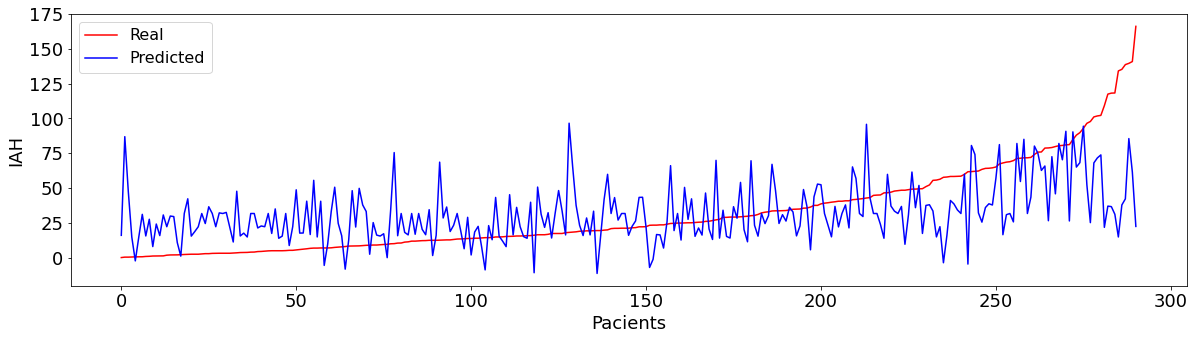

In [ ]:
from importlib import reload
plt=reload(plt)
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(results.index, results['IAH'], 'r', label='Real')
plt.plot(results.index, results['Predict'], 'b', label='Predicted')
plt.xlabel('Pacients', fontsize=18)
plt.ylabel('IAH', fontsize=18) 
plt.legend(fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

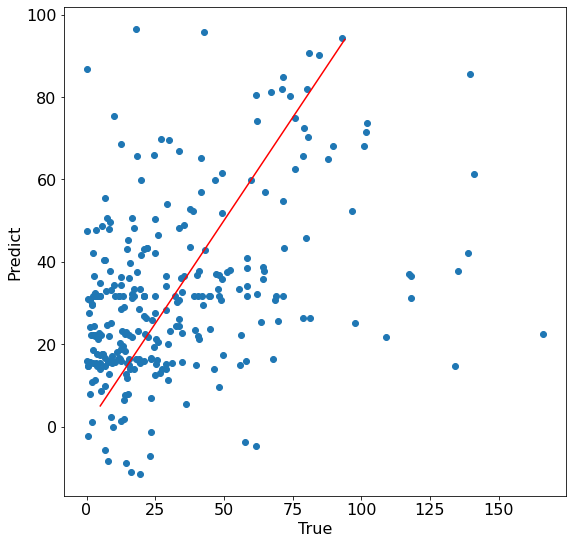

In [ ]:
plt.rcParams['figure.figsize'] = [9, 9]
plt.scatter(df['IAH'], predict)
plt.plot(range(5, 95), range(5,95), 'red')
plt.xlabel('True', fontsize=16)
plt.ylabel('Predict', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Testes com dados antropométricos

In [ ]:
y = df['IAH'].copy()
X = df.iloc[:, 5:].copy()

In [ ]:
X = MinMaxScaler((-1,1)).fit_transform(X)
X

array([[-0.47692308,  0.07936508, -0.62093023, ..., -0.59054935,
         1.        , -1.        ],
       [-0.01538462, -0.14285714, -0.28255814, ..., -0.5639908 ,
         1.        , -1.        ],
       [-0.72307692,  0.52380952, -0.37209302, ..., -0.27566861,
        -1.        ,  1.        ],
       ...,
       [ 0.01538462,  0.04761905, -0.33488372, ..., -0.52257181,
        -1.        ,  1.        ],
       [ 0.26153846,  0.04518596, -0.39230224, ..., -0.0877971 ,
        -1.        ,  1.        ],
       [ 0.23076923, -0.23809524, -0.08139535, ..., -0.15352127,
         1.        , -1.        ]])

In [ ]:
max = [0,0,0]
for i in range(5):
    regressor=MLPRegressor(hidden_layer_sizes=(22,), max_iter=5000, activation="tanh", learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(regressor, X, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring= {'r':get_r_numpy_corrcoef_scorer, 'rmse':mean_squared_error_score} , return_estimator = True)
    #Calculando a acurácia do teste
    corrcoef =  np.mean(result['test_r'])
    rmse = np.mean(result['test_rmse'])
    print("Coefficiente: ",  corrcoef)
    print("RMSE: ", rmse)

    if (max[0] < corrcoef):
        max[0] = corrcoef
        max[1] = rmse
        max[2] = i
        regressor_max =regressor
print(f"Melhor resultado: \n Corr Coef: {max[0]}\n RMSE: {max[1]}\n Seed: {max[2]}")

Coefficiente:  0.4460461752057944
RMSE:  28.79738439383747
Coefficiente:  0.5409723903570383
RMSE:  27.910631856369072
Coefficiente:  0.4926237077804103
RMSE:  28.327753402399104
Coefficiente:  0.487192646604851
RMSE:  28.55663570588548
Coefficiente:  0.5449859196011617
RMSE:  26.893939070394403
Melhor resultado: 
 Corr Coef: 0.5449859196011617
 RMSE: 26.893939070394403
 Seed: 4


In [ ]:
predict = cross_val_predict(regressor_max, X, y, cv = KFold(n_splits=10, shuffle=True))

In [ ]:
results = {'IAH':df['IAH'],
           'Predict':predict}
results = pd.DataFrame(results)
results = results.sort_values('IAH').reset_index(drop=True)
results

,IAH,Predict
0,0.00,20.482328
1,0.30,19.275989
2,0.30,0.243606
3,0.40,16.222842
4,0.50,-23.076427
...,...,...
286,135.30,52.702032
287,138.70,45.570040
288,139.61,82.395707
289,140.90,78.572683


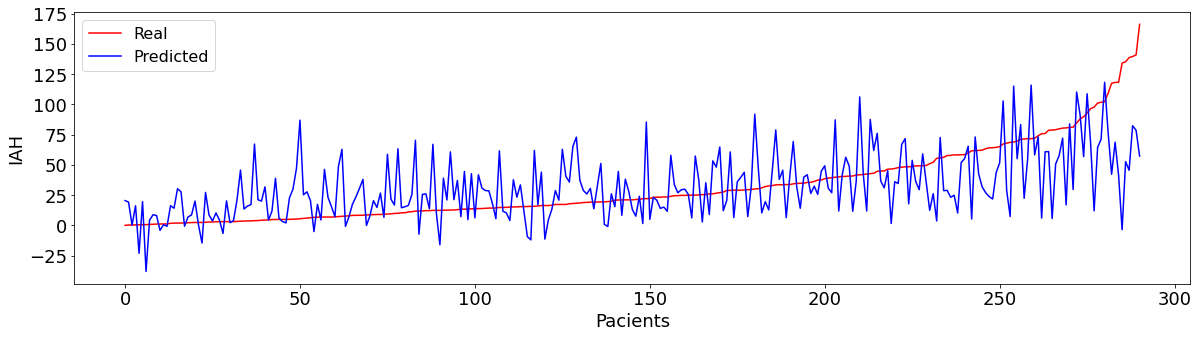

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(results.index, results['IAH'], 'r', label='Real')
plt.plot(results.index, results['Predict'], 'b', label='Predicted')
plt.xlabel('Pacients', fontsize=18)
plt.ylabel('IAH', fontsize=18) 
plt.legend(fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

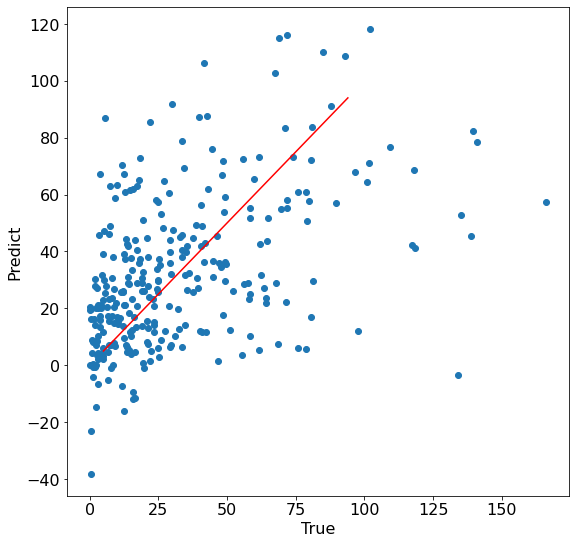

In [ ]:
plt.rcParams['figure.figsize'] = [9, 9]
plt.scatter(df['IAH'], predict)
plt.plot(range(5, 95), range(5,95), 'red')
plt.xlabel('True', fontsize=16)
plt.ylabel('Predict', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Testes com dados antropométricos + T90 e SatMin

In [ ]:
y = df['IAH'].copy()
X = df.iloc[:, 3:].copy()

In [ ]:
X.shape

(291, 42)

In [ ]:
X = MinMaxScaler((-1,1)).fit_transform(X)
X

array([[-0.9994    ,  0.73770492, -0.47692308, ..., -0.59054935,
         1.        , -1.        ],
       [-1.        ,  0.90163934, -0.01538462, ..., -0.5639908 ,
         1.        , -1.        ],
       [-1.        ,  0.90163934, -0.72307692, ..., -0.27566861,
        -1.        ,  1.        ],
       ...,
       [-0.964     ,  0.57377049,  0.01538462, ..., -0.52257181,
        -1.        ,  1.        ],
       [-0.908     ,  0.60655738,  0.26153846, ..., -0.0877971 ,
        -1.        ,  1.        ],
       [ 0.716     , -0.47540984,  0.23076923, ..., -0.15352127,
         1.        , -1.        ]])

In [ ]:
max = [0,0,0]
for i in range(5):
    regressor=MLPRegressor(hidden_layer_sizes=(22,), max_iter=5000, activation="tanh", learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(regressor, X, y, cv = KFold(n_splits=10, shuffle=True), 
    scoring= {'r':get_r_numpy_corrcoef_scorer, 'rmse':mean_squared_error_score} , return_estimator = True)
    #Calculando a acurácia do teste
    corrcoef =  np.mean(result['test_r'])
    rmse = np.mean(result['test_rmse'])
    print("Coefficiente: ",  corrcoef)
    print("RMSE: ", rmse)

    if (max[0] < corrcoef):
        max[0] = corrcoef
        max[1] = rmse
        max[2] = i
        regressor_max =regressor
print(f"Melhor resultado: \n Corr Coef: {max[0]}\n RMSE: {max[1]}\n Seed: {max[2]}")

Coefficiente:  0.4702754334318812
RMSE:  26.232363412815126
Coefficiente:  0.5782338541147868
RMSE:  26.79772693207686
Coefficiente:  0.5799421055325249
RMSE:  26.281346337266463
Coefficiente:  0.5322633749161734
RMSE:  27.316370821077392
Coefficiente:  0.3993815416951501
RMSE:  27.94300934650205
Melhor resultado: 
 Corr Coef: 0.5799421055325249
 RMSE: 26.281346337266463
 Seed: 2


In [ ]:
predict = cross_val_predict(regressor_max, X, y, cv = KFold(n_splits=10, shuffle=True))

In [ ]:
results = {'IAH':df['IAH'],
           'Predict':predict}
results = pd.DataFrame(results)
results = results.sort_values('IAH').reset_index(drop=True)
results

,IAH,Predict
0,0.00,22.526128
1,0.30,38.590033
2,0.30,-7.920079
3,0.40,16.216614
4,0.50,23.894339
...,...,...
286,135.30,82.537109
287,138.70,58.125445
288,139.61,88.287888
289,140.90,107.322202


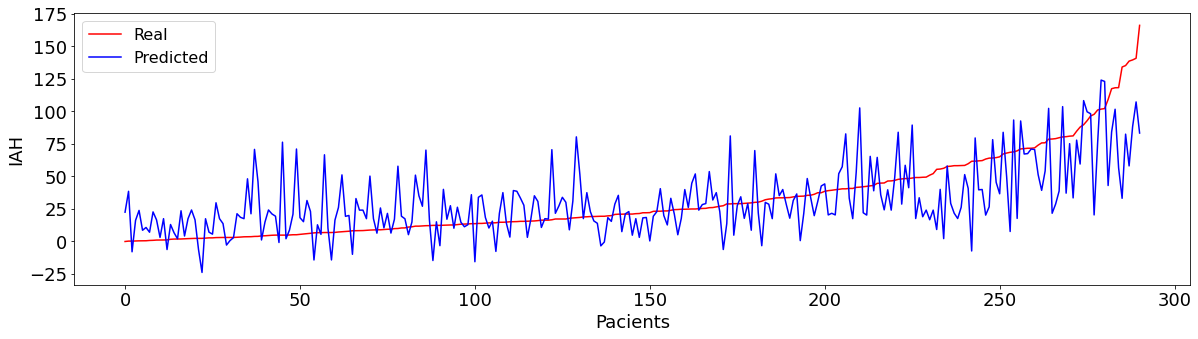

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(results.index, results['IAH'], 'r', label='Real')
plt.plot(results.index, results['Predict'], 'b', label='Predicted')
plt.xlabel('Pacients', fontsize=18)
plt.ylabel('IAH', fontsize=18) 
plt.legend(fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

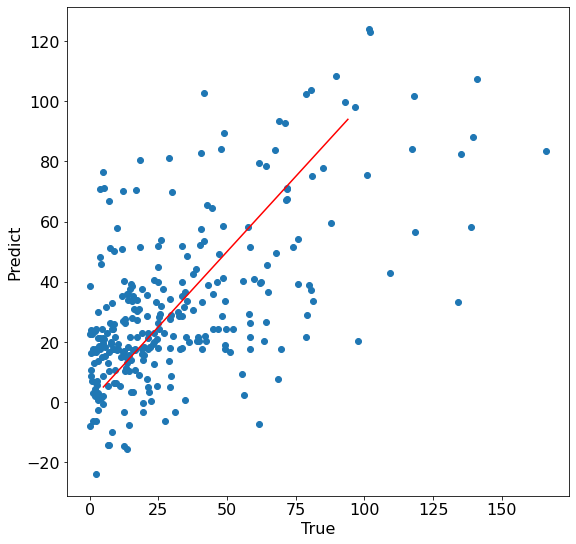

In [ ]:
plt.rcParams['figure.figsize'] = [9, 9]
plt.scatter(df['IAH'], predict)
plt.plot(range(5, 95), range(5,95), 'red')
plt.xlabel('True', fontsize=16)
plt.ylabel('Predict', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()